In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import lime
import lime.lime_tabular
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')





In [2]:
df = pd.read_csv(r"C:\Users\pc\OneDrive\Documents\java prog\XAI_Heart_Disease_Prediction\data\heart.csv")
df.head()



age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [3]:
# Check for nulls
df.isnull().sum()

# Basic stats
df.describe()


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

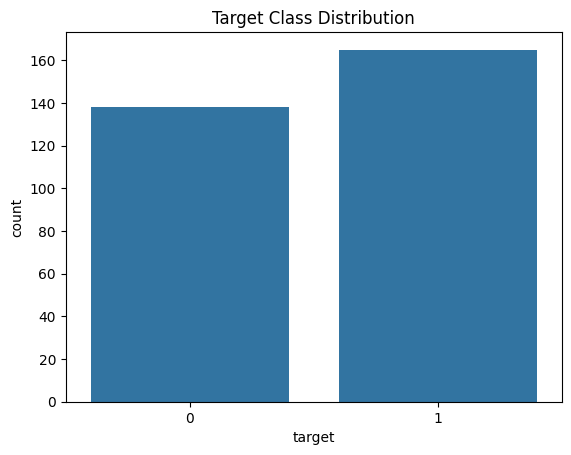

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.show()


In [4]:
# Features and target
X = df.drop("target", axis=1)
y = df["target"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



<Figure size 640x480 with 0 Axes>

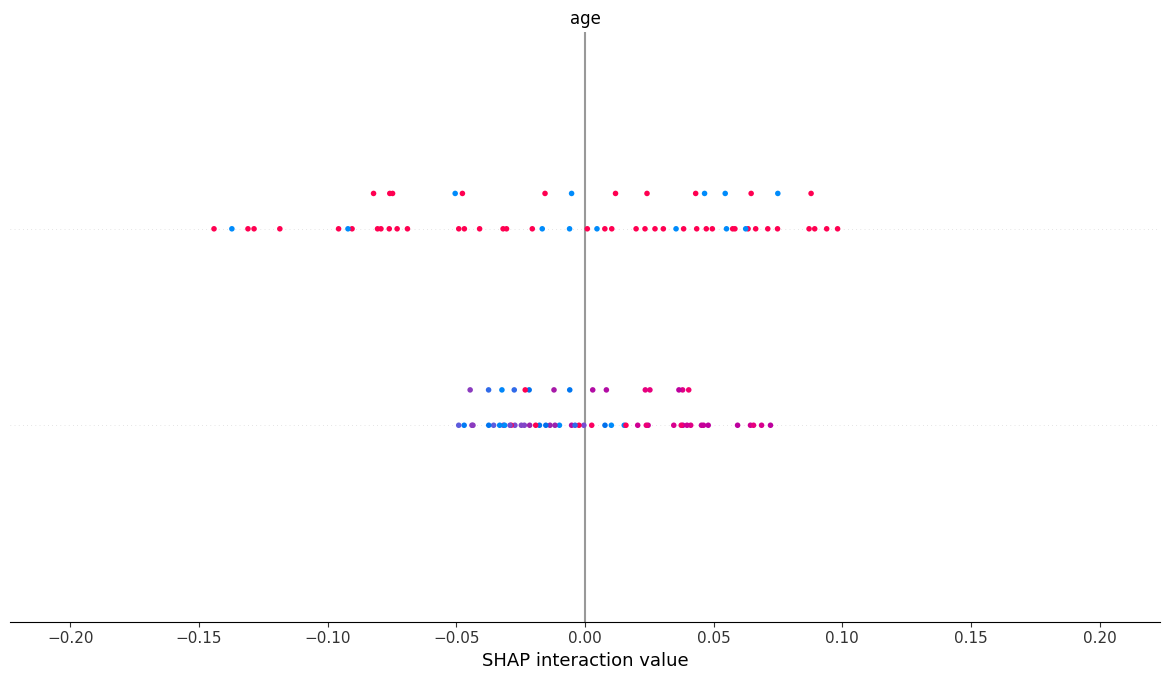

In [6]:
# Initialize SHAP Explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# Fix SHAP shape mismatch (copilot-style fix)
if isinstance(shap_values, list):
    for i in range(len(shap_values)):
        if shap_values[i].shape[1] != X_test.shape[1]:
            shap_values[i] = shap_values[i][:, :X_test.shape[1]]
else:
    if shap_values.shape[1] != X_test.shape[1]:
        shap_values = shap_values[:, :X_test.shape[1]]

# SHAP Summary Plot
if isinstance(shap_values, list):
    shap.summary_plot(shap_values[1], X_test, feature_names=X_test.columns)
else:
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


In [11]:
lime_explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['No Disease', 'Disease'],
    mode='classification'
)


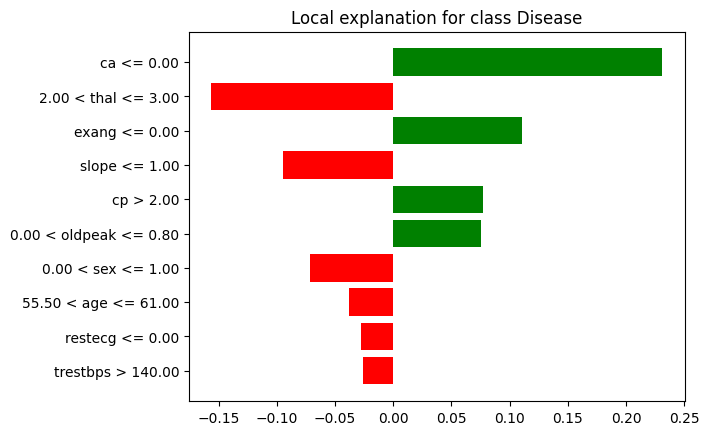

In [15]:
i = 1  # Index of test sample
exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[i],
    predict_fn=model.predict_proba
)

# ✅ Display the explanation in notebook (fix for IPython display)
from IPython.display import display, HTML

display(HTML(exp.as_html()))

# ✅ Optional: Plot explanation as bar chart
fig = exp.as_pyplot_figure()
fig.show()

In [ ]:
import pickle

model = pickle.load(open("C:\Users\pc\OneDrive\Documents\java prog\XAI_Heart_Disease_Prediction\model\heart_disease_model.pkl", "rb"))
print(type(model))  # Iska output kya aaya?


FileNotFoundError: [Errno 2] No such file or directory: 'XAI_Heart_Disease_Prediction/model/heart_disease_model.pkl'